# Diabetes Prediction Model Summary

## Introduction

In this project, We developed a machine learning model to predict whether a person has diabetes or not. The dataset used for this project was obtained from Kaggle, and data analysis was performed to understand the features and their relationship with the target variable.

## Data Analysis

The dataset contained 768 samples with 9 features and 1 target variable. The features included age, BMI, blood pressure, insulin level, and others. The target variable was binary, indicating whether the person has diabetes or not.

Exploratory data analysis was performed to understand the distribution of the features and their relationship with the target variable. Several visualizations were created, such as histograms, and box plots, to identify any patterns or outliers in the data.

## Data Preprocessing

Before building the machine learning model, the data was preprocessed to handle missing values, outliers, and categorical features. Missing values were imputed using mean or median values, depending on the feature. Outliers were detected using the Z-Scores and removed from the dataset. Categorical features were converted to numerical values using Labelencoder.

## Model Development

Models are developed using Nueral Networks. The dataset was split into training and testing sets, and the model was trained on the training set and evaluated on the testing set using several performance metrics, such as accuracy, precision, recall, and F1 score.





In [1]:
import numpy as np
import pandas as pd
import pickle

## Data Collection

For this project, we used the `opendatasets` module to download the diabetes dataset from Kaggle. The dataset contains information about patients with diabetes, including their age, sex, BMI, blood pressure, and other clinical measurements. The goal of our project is to use machine learning techniques to predict whether a patient has diabetes based on these features.

To download the dataset using `opendatasets`, we first installed the module using the following command:



In [2]:
# !pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mathchi/diabetes-data-set")

Skipping, found downloaded files in ".\diabetes-data-set" (use force=True to force download)


In [4]:
df=pd.read_csv("diabetes-data-set\\diabetes.csv")

In [5]:
gender = ['Male', 'Female']
gender_data= np.random.choice(gender,len(df))
df['Gender']=gender_data

## Dataset Information
To start exploring the diabetes dataset, I first used the df.info() method to display an overview of the dataset. This method provides information such as the number of rows and columns, the data types of each column, and any missing values.




In [6]:
# Display the first 5 rows of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,148,72,35,0,33.6,0.627,50,1,Male
1,1,85,66,29,0,26.6,0.351,31,0,Male
2,8,183,64,0,0,23.3,0.672,32,1,Male
3,1,89,66,23,94,28.1,0.167,21,0,Male
4,0,137,40,35,168,43.1,2.288,33,1,Male


In [7]:
# Display the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 768
Number of columns: 10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Gender                    768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


## Encoding Categorical Features

In some cases, a dataset may contain categorical variables that need to be encoded as numerical values for use in machine learning models. One popular way to do this is to use the `LabelEncoder` class from scikit-learn, which can transform categorical variables into integers.

In [9]:
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder object
enc = LabelEncoder()

# Loop over all columns in the dataframe
for col in df.columns:
    # Check if the column data type is object (i.e. categorical)
    if df[col].dtypes == "object":
        # Use LabelEncoder to encode the categorical column
        df[col] = enc.fit_transform(df[col])

In [10]:
# Display data types of each column
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
Gender                        int32
dtype: object


In [11]:
# Display the first 5 rows of the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


## Removing Duplicate Records

To ensure the quality of our dataset, I checked for any duplicate records in the diabetes dataframe. Duplicate records can affect the accuracy of our analysis, so it's important to remove them as early as possible in the data cleaning process.

To check for duplicates, I used the `duplicated` method from pandas, which returns a boolean mask indicating whether each row is a duplicate of a previous row. Then,



In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [13]:
# Check if there are any duplicate records in the dataframe
if len(df[df.duplicated()]) > 0:
    # If duplicates are found, remove them from the dataframe
    df.drop_duplicates(inplace=True)

In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Gender                      0
dtype: int64

## Identifying and Replacing Zero Values

In some cases, zero values in a dataset may not represent meaningful information, but rather missing or erroneous data. To ensure the accuracy of our analysis, we identified any columns in the diabetes dataset that contained zero values and replaced them with NaN values. This allows us to handle missing values more easily during our data analysis process.


In [15]:
#Checking if zero values are present in these columns

# List of features to be checked for zero values
relevant_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

# Loop through each feature in the list and check if it contains any zero values
for x in relevant_features:
    if 0 not in df[x].values:
        relevant_features.remove(x)

# Print the list of relevant features that contain zero values
print(relevant_features)




['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [16]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df[relevant_features]=df[relevant_features].replace(0,np.NaN)

In [17]:
relevant_features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for x in relevant_features:
    print(0 in df[x].values)

False
False
False
False
False


## Visualizing the distribution

<AxesSubplot: xlabel='Glucose', ylabel='Count'>

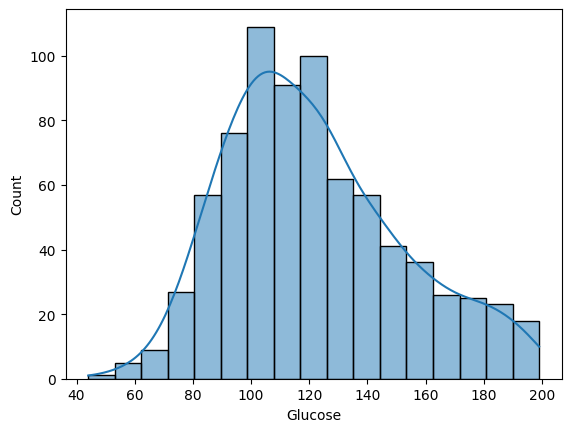

In [18]:
import seaborn as sns
sns.histplot(data=df, x='Glucose', kde=True)

<AxesSubplot: xlabel='Glucose'>

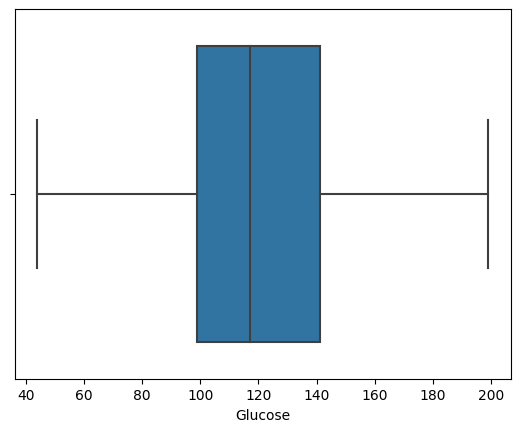

In [19]:
sns.boxplot(data=df, x='Glucose')

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

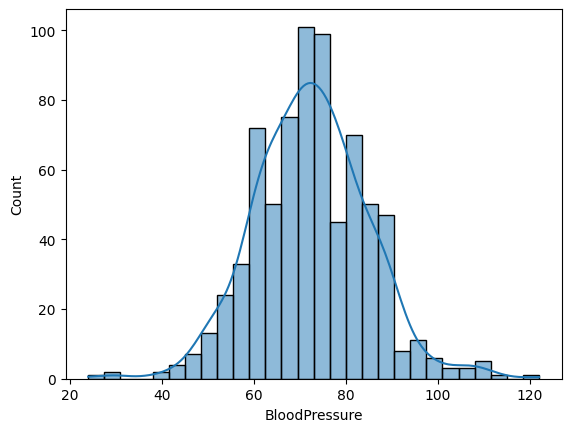

In [20]:
sns.histplot(data=df, x='BloodPressure', kde=True)

<AxesSubplot: xlabel='BloodPressure'>

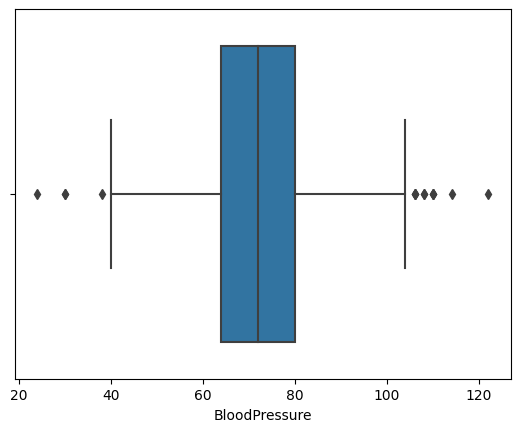

In [21]:
sns.boxplot(data=df, x='BloodPressure')

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

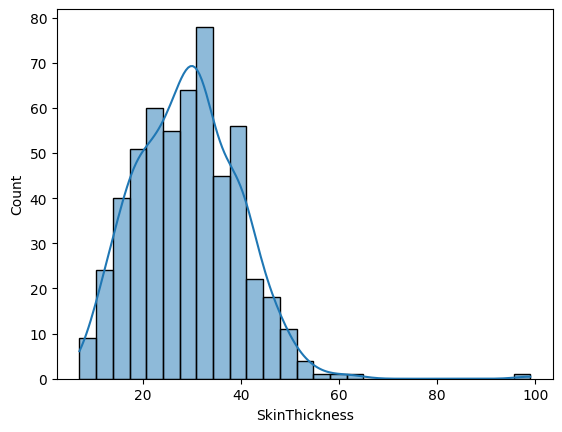

In [22]:

sns.histplot(data=df, x='SkinThickness', kde=True)

<AxesSubplot: xlabel='SkinThickness'>

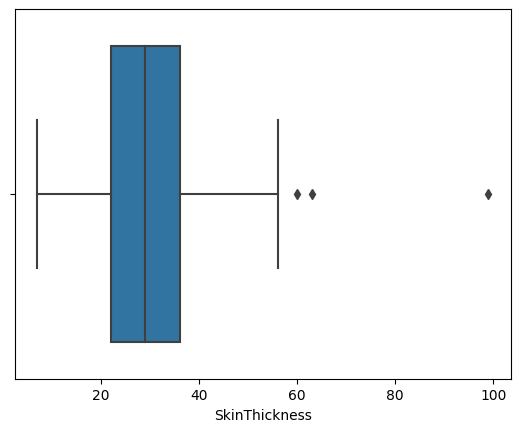

In [23]:
sns.boxplot(data=df, x='SkinThickness')

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

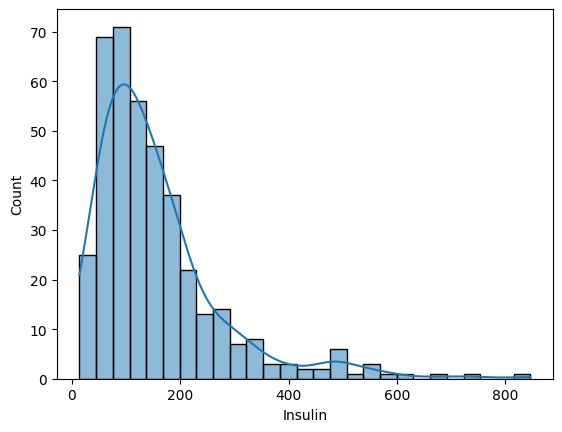

In [24]:
sns.histplot(data=df, x='Insulin', kde=True)

<AxesSubplot: xlabel='Insulin'>

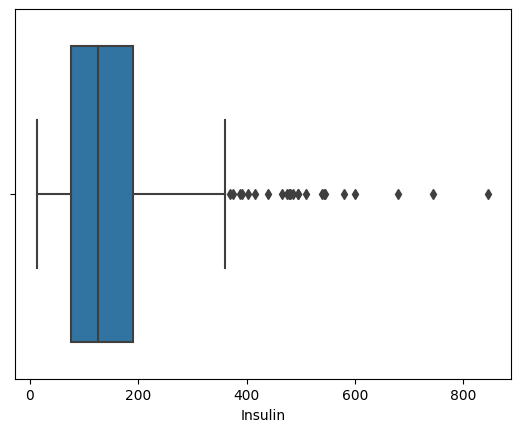

In [25]:
sns.boxplot(data=df, x='Insulin')

<AxesSubplot: xlabel='BMI', ylabel='Count'>

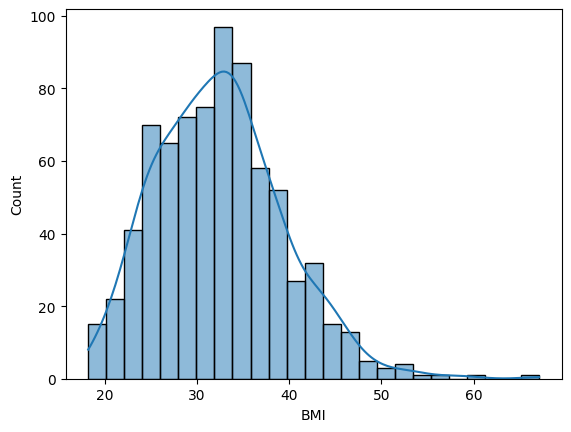

In [26]:
sns.histplot(data=df, x='BMI', kde=True)

<AxesSubplot: xlabel='BMI'>

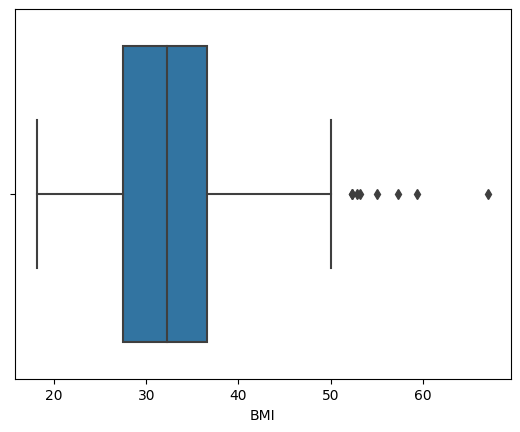

In [27]:
sns.boxplot(data=df, x='BMI')

## Eliminating Outliers with Z-Scores

Another common method for identifying and removing outliers is using z-scores. Z-score is a statistical measure that tells how many standard deviations a data point is from the mean. We can use z-scores to identify outliers that are beyond a certain number of standard deviations from the mean.

To eliminate outliers using z-scores, we can follow these steps:

1. Calculate the mean and standard deviation of the column.
2. Calculate the z-score of each data point in the column.
3. Define a threshold range as, for example, three times the standard deviation above or below the mean.
4. Identify and remove any values outside the threshold range.




In [28]:
#we are not considering the categorical variable for z score calculations
exp_df=df.drop(['Gender','Outcome'],axis=1)

In [29]:
aside_df=df[['Gender','Outcome']]

In [30]:
exp_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [31]:
#Calculating the Z-Score
z_scores = np.abs((exp_df - exp_df.mean()) / exp_df.std())

In [32]:
print(z_scores.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639530  0.861722       0.032723       0.558040       NaN  0.164987   
1     0.844335  1.201441       0.517291       0.014643       NaN  0.845845   
2     1.233077  2.007924       0.678814            NaN       NaN  1.322380   
3     0.844335  1.070446       0.517291       0.587327  0.518188  0.629238   
4     1.141108  0.501487       2.617087       0.558040  0.104834  1.536831   

   DiabetesPedigreeFunction       Age  
0                  0.468187  1.425067  
1                  0.364823  0.190548  
2                  0.604004  0.105515  
3                  0.920163  1.040871  
4                  5.481337  0.020483  


In [33]:
thershold=3
cleaned_df=exp_df[z_scores<=thershold]

In [34]:
cleaned_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0


## Exploring Histograms after Eliminating Outliers

After eliminating the outliers using the Z-score method, I have re-examined the distribution of each variable through histograms. Overall, the histograms showed a more normal distribution for each variable, indicating that the elimination of outliers helped to improve the normality of the data. However, some variables still exhibit a slight skew, such as DiabetesPedigreeFunction,Insulin which are skewed to the left.


<AxesSubplot: xlabel='Glucose', ylabel='Count'>

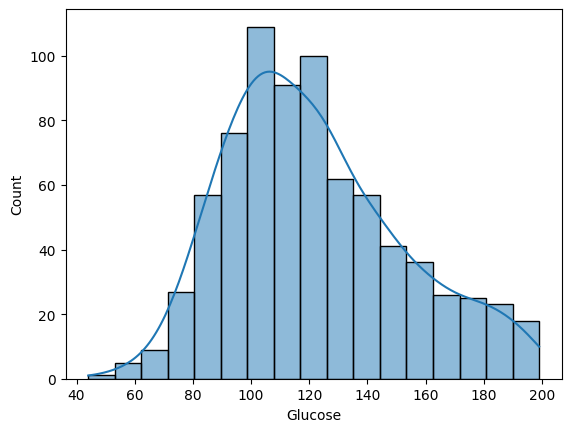

In [35]:
sns.histplot(data=cleaned_df, x='Glucose', kde=True)

<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

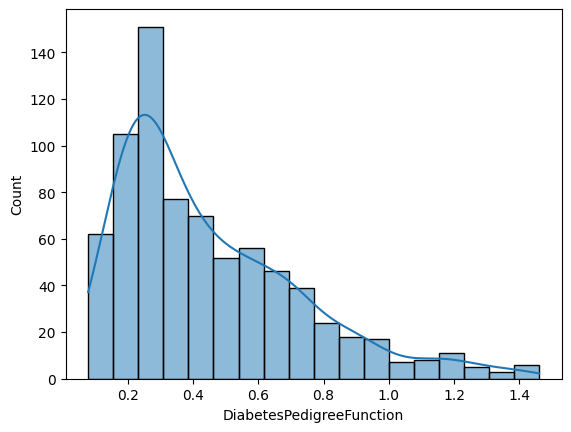

In [36]:
sns.histplot(data=cleaned_df, x='DiabetesPedigreeFunction', kde=True)

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

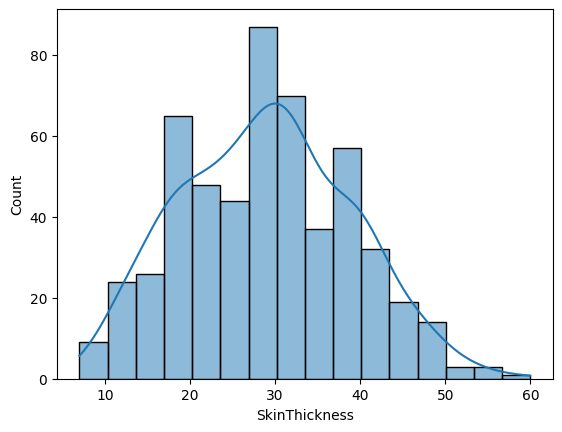

In [37]:
sns.histplot(data=cleaned_df, x='SkinThickness', kde=True)

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

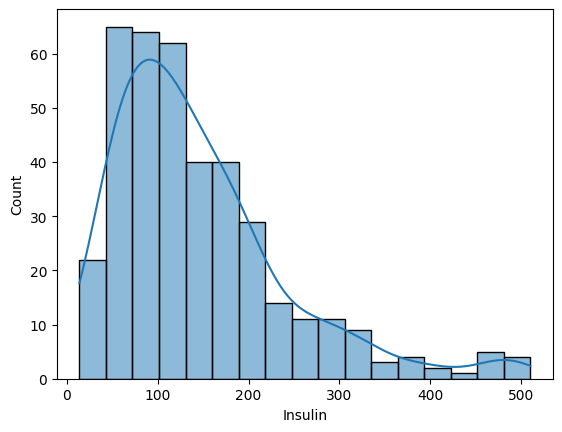

In [38]:
sns.histplot(data=cleaned_df, x='Insulin', kde=True)

<AxesSubplot: xlabel='BMI', ylabel='Count'>

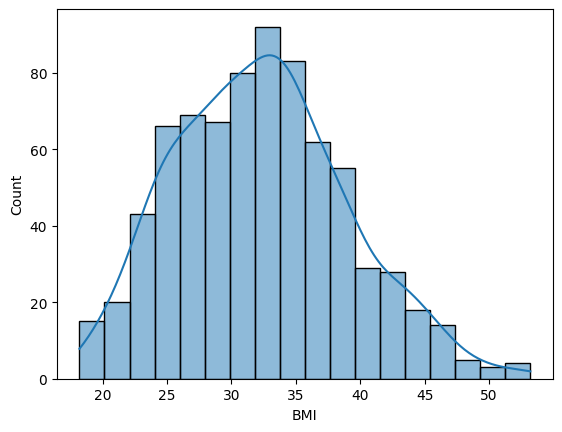

In [39]:
sns.histplot(data=cleaned_df, x='BMI', kde=True)

<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

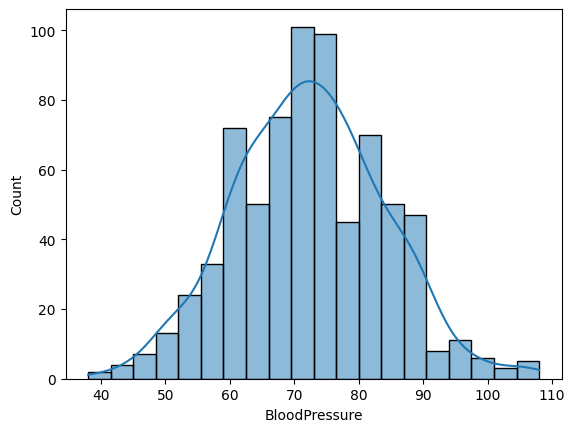

In [40]:
sns.histplot(data=cleaned_df, x='BloodPressure', kde=True)

## Checking for null values

In [41]:
df.shape

(768, 10)

In [42]:
#Checking for the null values 
null_columns=[]
count_nan=cleaned_df.isna().sum()
print(count_nan)

for key, value in count_nan.items():
    if value!= 0:
        null_columns.append(key)
    
print(null_columns)


Pregnancies                   4
Glucose                       5
BloodPressure                43
SkinThickness               229
Insulin                     382
BMI                          15
DiabetesPedigreeFunction     11
Age                           5
dtype: int64
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


## Filling the missing values with mean and median depending on skewness of the distribution


In [43]:

print(cleaned_df[null_columns].describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   764.000000  763.000000     725.000000     539.000000  386.000000   
mean      3.786649  121.686763      72.307586      28.961039  145.619171   
std       3.278714   30.535641      11.625629       9.946902   96.453757   
min       0.000000   44.000000      38.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.000000   
50%       3.000000  117.000000      72.000000      29.000000  122.000000   
75%       6.000000  141.000000      80.000000      36.000000  183.750000   
max      13.000000  199.000000     108.000000      60.000000  510.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  753.000000                757.000000  763.000000  
mean    32.312749                  0.450923   32.985583  
std      6.643189                  0.281586   11.360060  
min     18.200000                  0.078000   21.000000  
25%     27.500000        

In [44]:
# Loop through each feature in the list of columns with null values
for feature in null_columns:
    
    print(feature, cleaned_df[feature].skew())
    
    # If the skewness is less than 0.5, fill missing values with mean
    if cleaned_df[feature].skew() < 0.5:
        cleaned_df[feature].fillna(cleaned_df[feature].mean(), inplace=True)
    
    # If the skewness is greater than or equal to 0.5, fill missing values with median
    else:
        cleaned_df[feature].fillna(cleaned_df[feature].median(), inplace=True)


    

Pregnancies 0.8227569589090173
Glucose 0.5309885349396285
BloodPressure 0.1120639007914581
SkinThickness 0.14881354128006405
Insulin 1.4884506771238524
BMI 0.3420884786689519
DiabetesPedigreeFunction 1.16083364759528
Age 1.0523897665646829


In [45]:
print(cleaned_df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [46]:
cleaned_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,122.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,122.0,26.6,0.351,31.0
2,8.0,183.0,64.0,28.961039,122.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.0,43.1,0.366,33.0


In [47]:
#combining both the datasets togeather
final_df=pd.concat([cleaned_df,aside_df],axis=1)

In [48]:
final_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Gender,Outcome
0,6.0,148.0,72.0,35.000000,122.0,33.6,0.627,50.0,1,1
1,1.0,85.0,66.0,29.000000,122.0,26.6,0.351,31.0,1,0
2,8.0,183.0,64.0,28.961039,122.0,23.3,0.672,32.0,1,1
3,1.0,89.0,66.0,23.000000,94.0,28.1,0.167,21.0,1,0
4,0.0,137.0,40.0,35.000000,168.0,43.1,0.366,33.0,1,1


## Model Buliding


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=final_df.drop(columns='Outcome')
y=final_df['Outcome']

## Splitting the Data into Training and Testing Sets

To evaluate the performance of our machine learning model, we need to split our dataset into training and testing sets. This can be achieved using the `train_test_split` function from the scikit-learn library.

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=123)

## LSTM

In [51]:
# Import necessary libraries

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstmmodel = Sequential()
lstmmodel.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1]), return_sequences=True))
lstmmodel.add(LSTM(50, activation='relu', return_sequences=True))  # Additional LSTM layer
lstmmodel.add(LSTM(50, activation='relu'))  # Additional LSTM layer
lstmmodel.add(Dense(64, activation='relu'))
lstmmodel.add(Dropout(0.5))
lstmmodel.add(Dense(1, activation='sigmoid'))

lstmmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstmmodel.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

accuracy = lstmmodel.evaluate(X_test_lstm, y_test)[1]
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
16/16 [==============================] - 5s 48ms/step - loss: 0.6865 - accuracy: 0.6578 - val_loss: 0.6814 - val_accuracy: 0.6341
Epoch 2/10
16/16 [==============================] - 0s 8ms/step - loss: 0.6711 - accuracy: 0.6640 - val_loss: 0.6664 - val_accuracy: 0.6341
Epoch 3/10
16/16 [==============================] - 0s 7ms/step - loss: 0.6485 - accuracy: 0.6640 - val_loss: 0.6386 - val_accuracy: 0.6341
Epoch 4/10
16/16 [==============================] - 0s 7ms/step - loss: 0.6080 - accuracy: 0.6640 - val_loss: 0.5723 - val_accuracy: 0.6341
Epoch 5/10
16/16 [==============================] - 0s 8ms/step - loss: 0.5533 - accuracy: 0.6640 - val_loss: 0.5231 - val_accuracy: 0.6341
Epoch 6/10
16/16 [==============================] - 0s 8ms/step - loss: 0.5187 - accuracy: 0.6782 - val_loss: 0.5055 - val_accuracy: 0.7561
Epoch 7/10
16/16 [==============================] - 0s 8ms/step - loss: 0.5092 - accuracy: 0.7352 - val_loss: 0.4983 - val_accuracy: 0.7724
Epoch 8/10
16/16 [=

## SIMPLERNN

In [52]:
from tensorflow.keras.layers import SimpleRNN, Dense

# Reshape the input data for RNN
seq_length = X_train_scaled.shape[1]  # Use the number of features as the sequence length
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], seq_length, 1))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], seq_length, 1))

# Build the RNN model with additional layers
rnnmodel = Sequential()

# Input layer
rnnmodel.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True))
rnnmodel.add(Dropout(0.2))  # Adding dropout for regularization

# Hidden layers
rnnmodel.add(SimpleRNN(50, activation='relu', return_sequences=True))
rnnmodel.add(Dropout(0.2))

rnnmodel.add(SimpleRNN(50, activation='relu'))  # Last layer in the sequence
rnnmodel.add(Dropout(0.2))

# Output layer
rnnmodel.add(Dense(1, activation='sigmoid'))

# Compile the model
rnnmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnnmodel.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
accuracy = rnnmodel.evaluate(X_test_rnn, y_test)[1]
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
16/16 [==============================] - 4s 50ms/step - loss: 0.6343 - accuracy: 0.6415 - val_loss: 0.5851 - val_accuracy: 0.6341
Epoch 2/10
16/16 [==============================] - 0s 12ms/step - loss: 0.5588 - accuracy: 0.6680 - val_loss: 0.5459 - val_accuracy: 0.6748
Epoch 3/10
16/16 [==============================] - 0s 13ms/step - loss: 0.5438 - accuracy: 0.7067 - val_loss: 0.5195 - val_accuracy: 0.7561
Epoch 4/10
16/16 [==============================] - 0s 11ms/step - loss: 0.5325 - accuracy: 0.6986 - val_loss: 0.5093 - val_accuracy: 0.7967
Epoch 5/10
16/16 [==============================] - 0s 11ms/step - loss: 0.5283 - accuracy: 0.7251 - val_loss: 0.4979 - val_accuracy: 0.7480
Epoch 6/10
16/16 [==============================] - 0s 12ms/step - loss: 0.5125 - accuracy: 0.7352 - val_loss: 0.4860 - val_accuracy: 0.7561
Epoch 7/10
16/16 [==============================] - 0s 10ms/step - loss: 0.5060 - accuracy: 0.7352 - val_loss: 0.4988 - val_accuracy: 0.7642
Epoch 8/10
16

## Inference the Neural Network Models performace with Random Forest and XGbBoost models

## Random Forest Model

In [53]:
# Import the RandomForestClassifier module from the scikit-learn library
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class with 5 estimators
rfc = RandomForestClassifier(n_estimators=5)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = rfc.predict(X_test)

# Compute the accuracy score of the model
print("Accuracy Score:", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score: 75.32467532467533 %


## XGBoost

In [54]:
# Import the XGBClassifier module from the xgboost library
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier class
xgb_model = XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# Compute the accuracy score of the model
print("Accuracy Score:", accuracy_score(y_test, y_pred)*100, "%")


Accuracy Score: 77.27272727272727 %


### LSTM Model gave us the best performing model with an accuracy of ~80% 

## Saving the Model as a Pickle File

After building the machine learning model to predict diabetes, I saved the model as a pickle file using the pickle module in Python. The pickle module is used to serialize and deserialize Python objects. In other words, it converts Python objects into a stream of bytes that can be stored in a file or transferred over a network.

In [55]:
model=lstmmodel

In [56]:
filename='diabetes-prediction-model.pkl'
pickle.dump(model, open(filename,'wb'))